In [3]:
#pretvaranje podataka i ciscenje dataseta
import pandas as pd

tickers = ['Nike', 'Adobe', 'Ebay', 'Electronic_Arts', 'Bank_of_America'] 

all_dataframes = {}

def clean_and_prepare_data(filename):
    dataset = pd.read_csv(f"{filename}.csv")
    df = dataset.copy()

    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce') 

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    df = df.dropna(subset=['Date'] + numeric_cols)
    df = df.sort_values('Date').reset_index(drop=True)
    
    return df

for ticker in tickers:
    try:
        all_dataframes[ticker] = clean_and_prepare_data(ticker)
        print(f"Uspješno učitan i očišćen: {ticker}")
    except Exception as e:
        print(f"Greška kod učitavanja {ticker}: {e}")

#provjera radi li za Nike
if 'Nike' in all_dataframes:
    print(all_dataframes['Nike'].head())

Uspješno učitan i očišćen: Nike
Uspješno učitan i očišćen: Adobe
Uspješno učitan i očišćen: Ebay
Uspješno učitan i očišćen: Electronic_Arts
Uspješno učitan i očišćen: Bank_of_America
        Date       Open       High        Low      Close      Adjusted_Close  \
0 2015-01-02  48.275002  48.474998  47.055000  47.514999  41.381507873535156   
1 2015-01-05  47.255001  47.275002  46.564999  46.750000   40.71525192260742   
2 2015-01-06  46.945000  47.075001  46.035000  46.474998   40.47576141357422   
3 2015-01-07  46.805000  47.650002  46.549999  47.435001  41.311832427978516   
4 2015-01-08  47.830002  48.549999  47.810001  48.529999  42.265480041503906   

      Volume  
0  4985800.0  
1  6889200.0  
2  7576000.0  
3  7256000.0  
4  5978200.0  


In [4]:
#normalizacija
from sklearn.preprocessing import MinMaxScaler
import joblib

#rjecnik u koji spremamo scalere za svaku tvrtku
all_scalers = {}

for ticker in tickers:
    if ticker in all_dataframes:
        scaler = MinMaxScaler()
        
        cols_to_scale = ['Close', 'Open', 'High', 'Low', 'Volume']
        
        all_dataframes[ticker][cols_to_scale] = scaler.fit_transform(all_dataframes[ticker][cols_to_scale])
        
        all_scalers[ticker] = scaler
        
        joblib.dump(scaler, f'scaler_{ticker}.pkl')
        
        print(f"Normalizirani podaci i spremljen scaler za: {ticker}")

#provjera radi li
first_ticker = tickers[0]
print(f"\nPrimjer normaliziranih podataka ({first_ticker}):")
print(all_dataframes[first_ticker].head())

Normalizirani podaci i spremljen scaler za: Nike
Normalizirani podaci i spremljen scaler za: Adobe
Normalizirani podaci i spremljen scaler za: Ebay
Normalizirani podaci i spremljen scaler za: Electronic_Arts
Normalizirani podaci i spremljen scaler za: Bank_of_America

Primjer normaliziranih podataka (Nike):
        Date      Open      High       Low     Close      Adjusted_Close  \
0 2015-01-02  0.019484  0.019700  0.013138  0.014630  41.381507873535156   
1 2015-01-05  0.011675  0.010694  0.009373  0.008831   40.71525192260742   
2 2015-01-06  0.009302  0.009193  0.005301  0.006746   40.47576141357422   
3 2015-01-07  0.008230  0.013508  0.009258  0.014023  41.311832427978516   
4 2015-01-08  0.016077  0.020263  0.018939  0.022323  42.265480041503906   

     Volume  
0  0.024690  
1  0.039543  
2  0.044903  
3  0.042406  
4  0.032434  


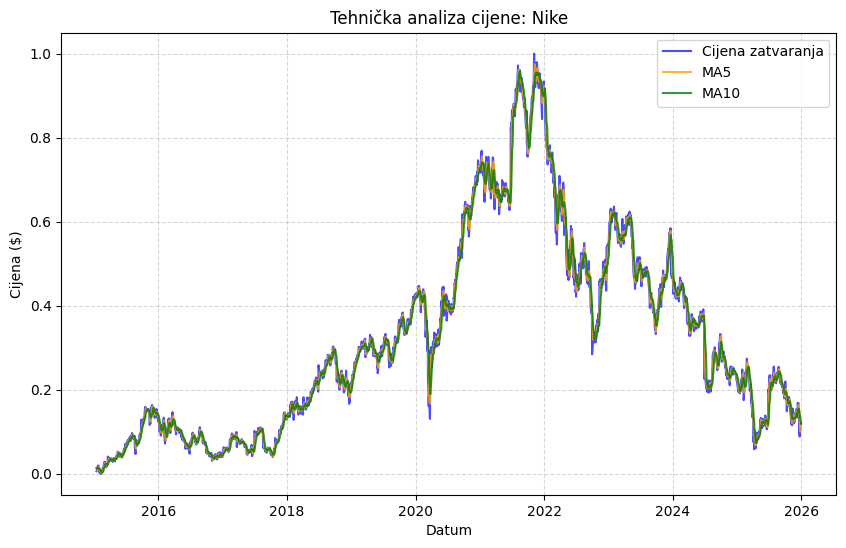

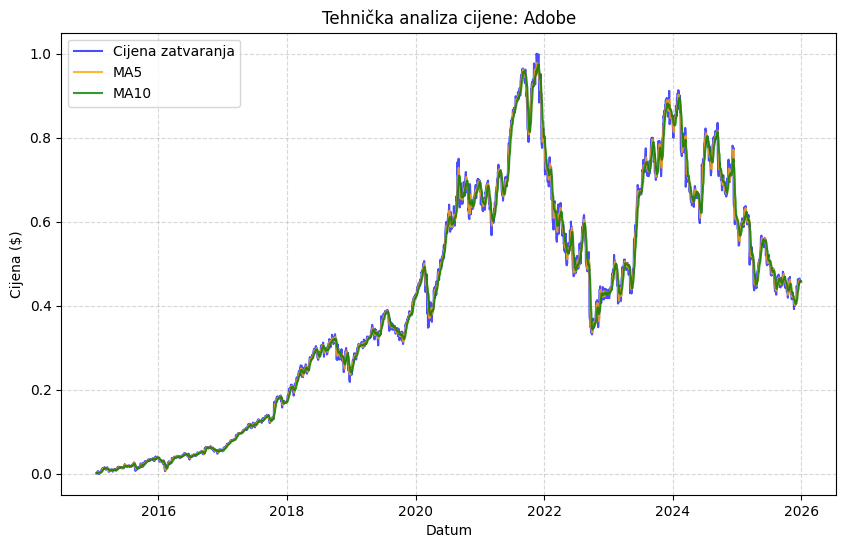

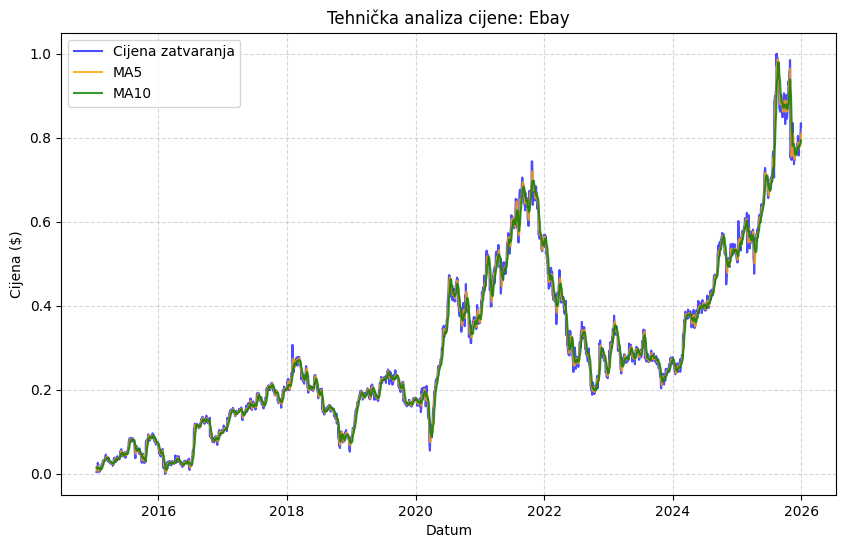

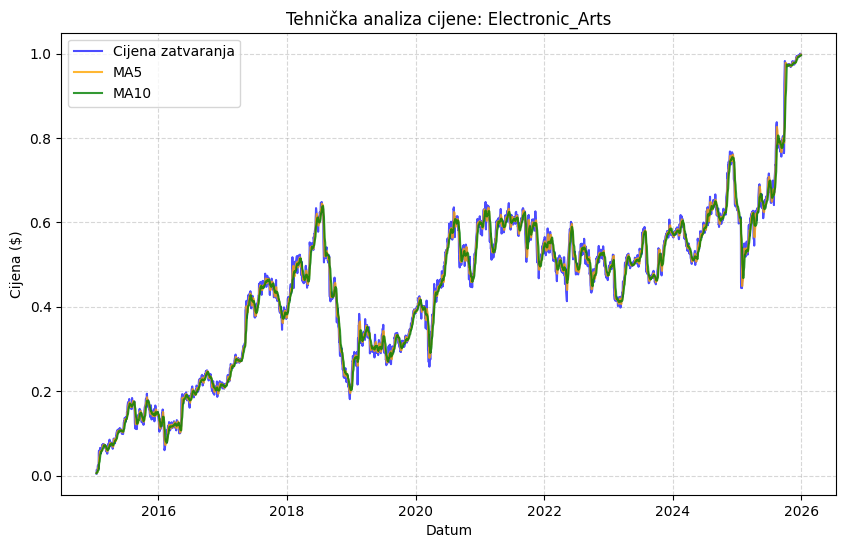

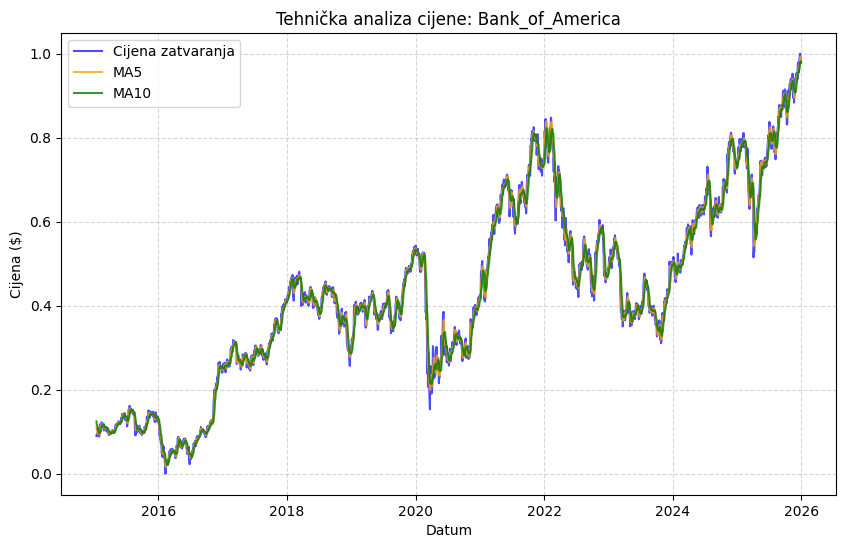

In [5]:
import matplotlib.pyplot as plt

for ticker in tickers:
    if ticker in all_dataframes:
        temp_df = all_dataframes[ticker]
        
        temp_df['Close_t-1'] = temp_df['Close'].shift(1)  #Close_t-1 je cijena zatvaranja jucer
        temp_df['Close_t-2'] = temp_df['Close'].shift(2)  #Close t-2 je cijena zatvaranja prije 2 dana
        
        temp_df['MA5'] = temp_df['Close'].rolling(window=5).mean()  #MA je moving average
        temp_df['MA10'] = temp_df['Close'].rolling(window=10).mean()
        
        all_dataframes[ticker] = temp_df.dropna()
        
        plt.figure(figsize=(10, 6))
        plt.plot(all_dataframes[ticker]['Date'], all_dataframes[ticker]['Close'], label='Cijena zatvaranja', color='blue', alpha=0.7)
        plt.plot(all_dataframes[ticker]['Date'], all_dataframes[ticker]['MA5'], label='MA5', color='orange', alpha=0.8)
        plt.plot(all_dataframes[ticker]['Date'], all_dataframes[ticker]['MA10'], label='MA10', color='green', alpha=0.8)
        
        plt.title(f'Tehnička analiza cijene: {ticker}')
        plt.xlabel('Datum')
        plt.ylabel('Cijena ($)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()



--- Treniranje modela za: Nike ---
  LinearRegression   -> MAE: 0.0082, R2: 0.9887
  RandomForest       -> MAE: 0.0097, R2: 0.9853
  DecisionTree       -> MAE: 0.0150, R2: 0.9696
  SVR                -> MAE: 0.0150, R2: 0.9316
  KNN                -> MAE: 0.0113, R2: 0.9798
 Najbolji model za Nike: LinearRegression

--- Treniranje modela za: Adobe ---
  LinearRegression   -> MAE: 0.0095, R2: 0.9910
  RandomForest       -> MAE: 0.0110, R2: 0.9876
  DecisionTree       -> MAE: 0.0163, R2: 0.9771
  SVR                -> MAE: 0.0157, R2: 0.9803
  KNN                -> MAE: 0.0134, R2: 0.9848
 Najbolji model za Adobe: LinearRegression

--- Treniranje modela za: Ebay ---
  LinearRegression   -> MAE: 0.0100, R2: 0.9939
  RandomForest       -> MAE: 0.0368, R2: 0.8730
  DecisionTree       -> MAE: 0.0429, R2: 0.8513
  SVR                -> MAE: 0.1135, R2: 0.1044
  KNN                -> MAE: 0.0383, R2: 0.8638
 Najbolji model za Ebay: LinearRegression

--- Treniranje modela za: Electronic_Arts -

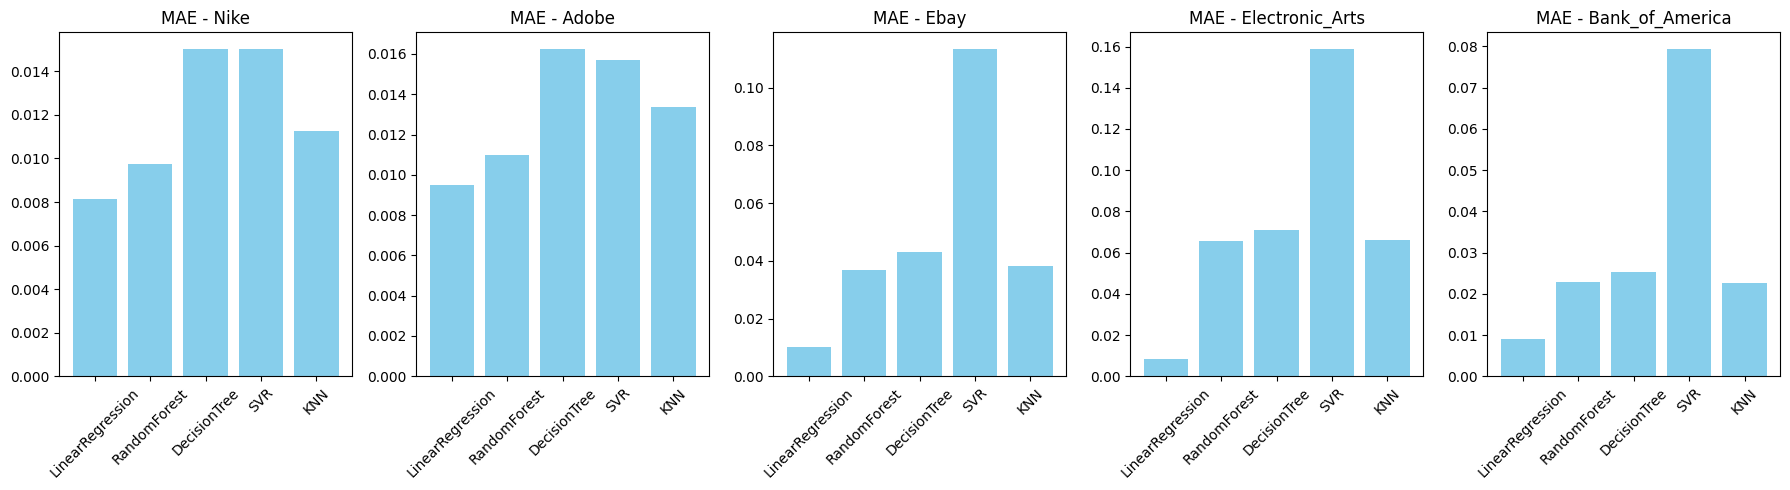

In [6]:
#treniranje
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

all_results = {}
best_models_per_company = {}

features = ['Close_t-1', 'Close_t-2', 'MA5', 'MA10', 'Volume']

for ticker in tickers:
    print(f"\n--- Treniranje modela za: {ticker} ---")
    if ticker not in all_dataframes:
        print(f"Podaci za {ticker} nisu pronađeni!")
        continue
        
    temp_df = all_dataframes[ticker]
    X = temp_df[features]
    y = temp_df['Close']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    current_company_results = {}
    
    models = {
        'LinearRegression': LinearRegression(),
        'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'SVR': SVR(),
        'KNN': KNeighborsRegressor(n_neighbors=5) 
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        current_company_results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2, 'model': model}
        print(f"  {name:18} -> MAE: {mae:.4f}, R2: {r2:.4f}")

    best_name = min(current_company_results, key=lambda x: current_company_results[x]['MAE'])
    best_model_obj = current_company_results[best_name]['model']
    
    model_filename = f'best_model_{ticker}.pkl'
    joblib.dump(best_model_obj, model_filename)
    
    best_models_per_company[ticker] = {'name': best_name, 'mae': current_company_results[best_name]['MAE']}
    all_results[ticker] = current_company_results

    print(f" Najbolji model za {ticker}: {best_name}")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(tickers), figsize=(18, 5))
if len(tickers) == 1: axes = [axes]

for i, ticker in enumerate(tickers):
    axes[i].bar(all_results[ticker].keys(), [all_results[ticker][m]['MAE'] for m in all_results[ticker]], color='skyblue')
    axes[i].set_title(f'MAE - {ticker}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Optimizacija modela za: Nike
  [OK] RandomForest    -> Najbolji parametri: {'max_depth': 20, 'n_estimators': 100} | MAE: 0.0097
  [OK] DecisionTree    -> Najbolji parametri: {'max_depth': 10, 'min_samples_split': 2} | MAE: 0.0145
  [OK] SVR             -> Najbolji parametri: {'C': 10, 'gamma': 'auto'} | MAE: 0.0148
  [OK] KNN             -> Najbolji parametri: {'n_neighbors': 3, 'weights': 'uniform'} | MAE: 0.0128
Optimizacija modela za: Adobe
  [OK] RandomForest    -> Najbolji parametri: {'max_depth': None, 'n_estimators': 100} | MAE: 0.0112
  [OK] DecisionTree    -> Najbolji parametri: {'max_depth': 10, 'min_samples_split': 2} | MAE: 0.0149
  [OK] SVR             -> Najbolji parametri: {'C': 1, 'gamma': 'auto'} | MAE: 0.0179
  [OK] KNN             -> Najbolji parametri: {'n_neighbors': 3, 'weights': 'distance'} | MAE: 0.0147
Optimizacija modela za: Ebay
  [OK] RandomForest    -> Najbolji parametri: {'max_depth': 10, 'n_estimators': 100} | MAE: 0.0358
  [OK] DecisionTree    -> Najbolj

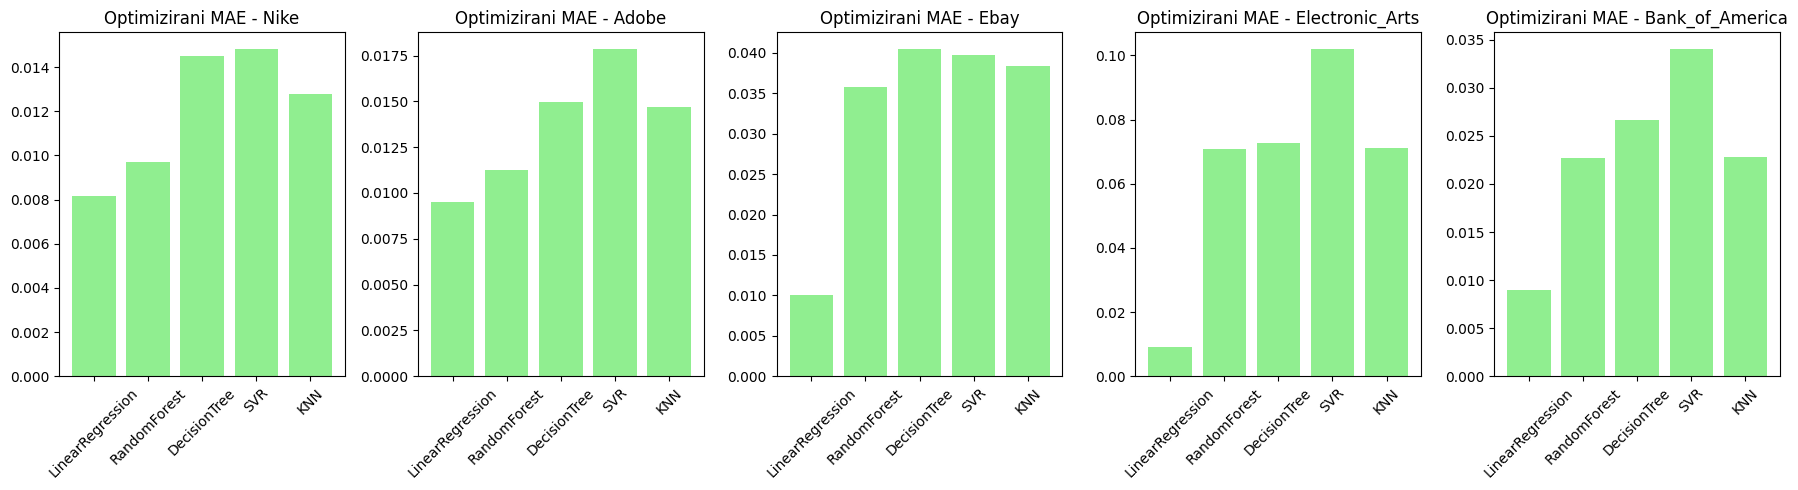

In [14]:
#podesavanje parametara i optimizacija
from sklearn.model_selection import GridSearchCV
import joblib

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }
}

final_tuned_results = {}

for ticker in tickers:
    print(f"Optimizacija modela za: {ticker}")
    temp_df = all_dataframes[ticker]
    X = temp_df[features]
    y = temp_df['Close']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    
    ticker_tuned_mae = {}
    
    for name, model in models.items():
        if name in param_grids:
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                                       cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            
            best_tuned_model = grid_search.best_estimator_
            y_pred = best_tuned_model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            
            ticker_tuned_mae[name] = mae
            print(f"  [OK] {name:15} -> Najbolji parametri: {grid_search.best_params_} | MAE: {mae:.4f}")
            
            if mae <= all_results[ticker][name]['MAE']:
                joblib.dump(best_tuned_model, f'best_model_{ticker}.pkl')
        else:
            ticker_tuned_mae[name] = all_results[ticker][name]['MAE']

    final_tuned_results[ticker] = ticker_tuned_mae

fig, axes = plt.subplots(1, len(tickers), figsize=(18, 5))
if len(tickers) == 1: axes = [axes]

for i, ticker in enumerate(tickers):
    axes[i].bar(final_tuned_results[ticker].keys(), final_tuned_results[ticker].values(), color='lightgreen')
    axes[i].set_title(f'Optimizirani MAE - {ticker}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
#registriranje modela
from azure.ai.ml import MLClient
from azure.ai.ml.entities import Model
from azure.identity import DefaultAzureCredential

try:
    ml_client = MLClient.from_config(credential=DefaultAzureCredential())
except Exception as e:
    print(f"Greška: {e}")

for ticker in tickers:
    model_name = f"{ticker.lower()}_stock_price_model"
    model_path = f"best_model_{ticker}.pkl" 
    
    my_model = Model(
        path=model_path,
        name=model_name,
        description=f"Model za predviđanje cijene dionice {ticker} temeljen na linearnoj regresiji",
        type="custom_model"
    )

    try:
        ml_client.models.create_or_update(my_model)
        print(f"Model {model_name} je uspješno registriran.")
    except Exception as e:
        print(f"Greška pri registraciji modela {ticker}: {e}")

Found the config file in: /config.json
Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


Model nike_stock_price_model je uspješno registriran.
Model adobe_stock_price_model je uspješno registriran.
Model ebay_stock_price_model je uspješno registriran.
Model electronic_arts_stock_price_model je uspješno registriran.
Model bank_of_america_stock_price_model je uspješno registriran.


In [18]:
%%writefile score.py
import os
import joblib
import json
import pandas as pd

def init():
    global models
    models = {}
    tickers = ['Nike', 'Adobe', 'Ebay', 'Electronic_Arts', 'Bank_of_America'] 
    
    base_path = os.getenv("AZUREML_MODEL_DIR")
    
    for ticker in tickers:
        try:
            model_name = f"{ticker.lower()}_stock_price_model"
            model_file_path = os.path.join(base_path, model_name, f"best_model_{ticker}.pkl")
            
            if not os.path.exists(model_file_path):
                 model_file_path = os.path.join(base_path, f"best_model_{ticker}.pkl")

            models[ticker] = joblib.load(model_file_path)
            print(f"Uspješno učitan model za: {ticker}")
        except Exception as e:
            print(f"Greška pri učitavanju modela za {ticker}: {e}")

def run(raw_data):
    try:
        input_data = json.loads(raw_data)
        company = input_data.get("company", "Nike") 
        data = input_data["data"]
        
        df = pd.DataFrame(data)
        
        #provjera postoji li za odredenu tvrtku
        if company in models:
            prediction = models[company].predict(df)
            return {"prediction": prediction.tolist(), "company": company}
        else:
            return {"error": f"Model za tvrtku '{company}' nije učitan."}
            
    except Exception as e:
        return {"error": str(e)}

Overwriting score.py


In [19]:
!pip install flask flask-cors

In [4]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import pandas as pd
import threading
import os

app = Flask(__name__)
CORS(app)

tickers = ['Nike', 'Adobe', 'Ebay', 'Electronic_Arts', 'Bank_of_America'] 
models = {}

print("Učitavanje modela")
for t in tickers:
    path = f"best_model_{t}.pkl"
    if os.path.exists(f"outputs/{path}"):
        path = f"outputs/{path}"
    
    if os.path.exists(path):
        models[t] = joblib.load(path)
        print(f"Model učitan za: {t}")
    else:
        print(f"Model nije pronađen za: {t}")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        
        selected_company = data.get("company", "Nike")
        
        if selected_company not in models:
            return jsonify({'error': f"Model za tvrtku {selected_company} nije dostupan"}), 400

        features_only = {k: v for k, v in data.items() if k != "company"}
        query_df = pd.DataFrame([features_only])
        
        prediction = models[selected_company].predict(query_df)
        
        return jsonify({
            'prediction': prediction.tolist(),
            'company': selected_company
        })
    except Exception as e:
        return jsonify({'error': str(e)})

def run_flask():
    app.run(host='0.0.0.0', port=8000, debug=False, use_reloader=False)

if not any(thread.name == "FlaskThread" for thread in threading.enumerate()):
    flask_thread = threading.Thread(target=run_flask, name="FlaskThread")
    flask_thread.daemon = True
    flask_thread.start()

Učitavanje modela


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://10.0.0.4:8000
Press CTRL+C to quit


In [23]:
import sys
!{sys.executable} -m pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 80.6 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.3/553.3 kB 16.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22/22 [gradio]21/22 [gradio]face-hub]


In [5]:
import gradio as gr
import requests
import pandas as pd

def predict_with_graph(company_name, c1, c2, ma5, ma10, vol):
    payload = {
        "company": company_name,
        "Close_t-1": c1, 
        "Close_t-2": c2, 
        "MA5": ma5, 
        "MA10": ma10, 
        "Volume": vol
    }
    try:
        res = requests.post("http://127.0.0.1:8000/predict", json=payload, timeout=5)
        data = res.json()
        
        if 'error' in data:
            return f"Greška s modelom: {data['error']}", pd.DataFrame()
            
        pred = data['prediction'][0]
        
        df_plot = pd.DataFrame({
            "Vrijeme": ["1. Prekjučer", "2. Jučer", "3. Sutra (Predviđanje)"],
            "Cijena ($)": [float(c2), float(c1), float(pred)]
        })
        
        return f"${pred:.2f}", df_plot
    except Exception as e:
        return f"Greška u povezivanju: {e}", pd.DataFrame(columns=["Vrijeme", "Cijena ($)"])

with gr.Blocks(title="Stock Predictor") as demo:
    gr.Markdown("Stock Price Predictor")
    gr.Markdown("Odaberite tvrtku i unesite parametre za predviđanje cijene dionice.")
    
    with gr.Row():
        with gr.Column():
            company_input = gr.Dropdown(
                choices=["Adobe", "Bank_of_America", "Ebay", "Electronic_Arts", "Nike"], 
                label="Odaberite tvrtku", 
                value="Adobe"
            )
            c1_in = gr.Number(label="Cijena jučer ($)", value=100.0)
            c2_in = gr.Number(label="Cijena prije 2 dana ($)", value=98.0)
            ma5_in = gr.Number(label="5-dnevni prosjek (MA5)", value=99.0)
            ma10_in = gr.Number(label="10-dnevni prosjek (MA10)", value=98.5)
            vol_in = gr.Number(label="Volumen trgovanja", value=1.0)
            
            btn = gr.Button("Izračunaj", variant="primary")
        
        with gr.Column():
            res_txt = gr.Textbox(label="Predviđena cijena za sutra")
            res_plot = gr.LinePlot(
                x="Vrijeme", 
                y="Cijena ($)", 
                title="Kretanje i prognoza cijene",
                y_lim=[None, None],
                tooltip=["Vrijeme", "Cijena ($)"]
            )

    btn.click(
        fn=predict_with_graph, 
        inputs=[company_input, c1_in, c2_in, ma5_in, ma10_in, vol_in], 
        outputs=[res_txt, res_plot]
    )
    

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://92e251a842c5d39cbf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


127.0.0.1 - - [14/Feb/2026 15:46:24] "POST /predict HTTP/1.1" 200 -


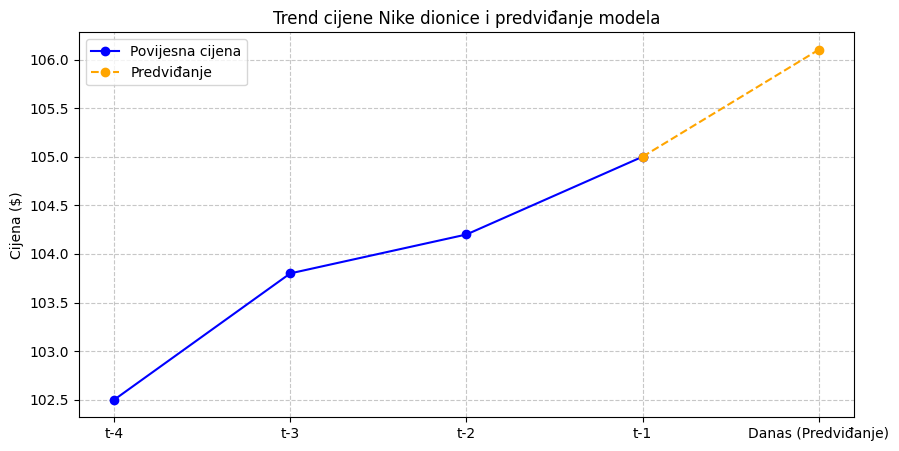

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

#simulacija predvidanja
data = {
    'Dan': ['t-4', 't-3', 't-2', 't-1', 'Danas (Predviđanje)'],
    'Cijena': [102.5, 103.8, 104.2, 105.0, 106.1] 
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.plot(df['Dan'][:4], df['Cijena'][:4], marker='o', label='Povijesna cijena', color='blue')
plt.plot(df['Dan'][3:], df['Cijena'][3:], marker='o', linestyle='--', label='Predviđanje', color='orange')
plt.title('Trend cijene Nike dionice i predviđanje modela')
plt.ylabel('Cijena ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [10]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_5111/4104927436.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_za_plot.drop(columns=['Date']).corr() if 'Date' in df_za_plot.columns else df_za_plot.corr()


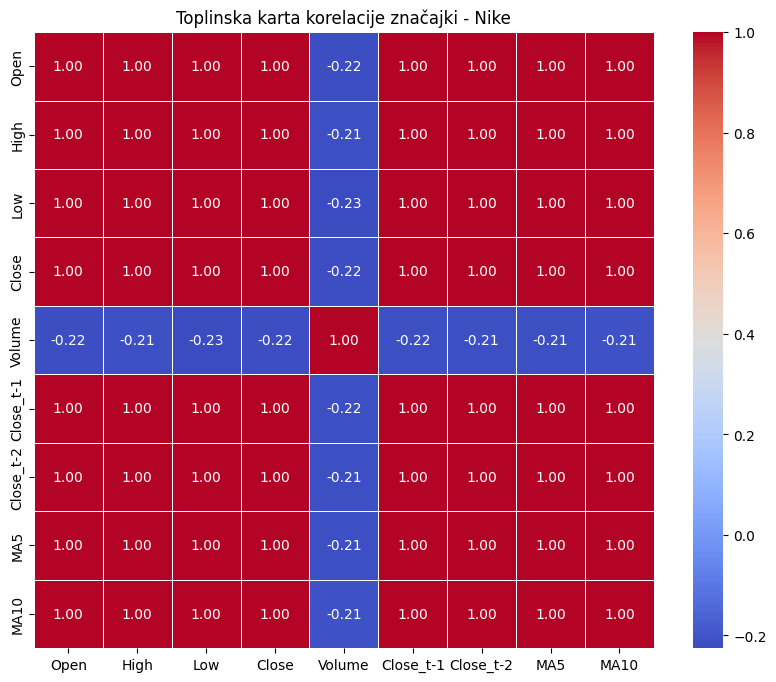

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ticker_za_analizu = 'Nike' 
df_za_plot = all_dataframes[ticker_za_analizu]

corr = df_za_plot.drop(columns=['Date']).corr() if 'Date' in df_za_plot.columns else df_za_plot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f"Toplinska karta korelacije značajki - {ticker_za_analizu}")
plt.savefig("heatmap_korelacija.png") 
plt.show()

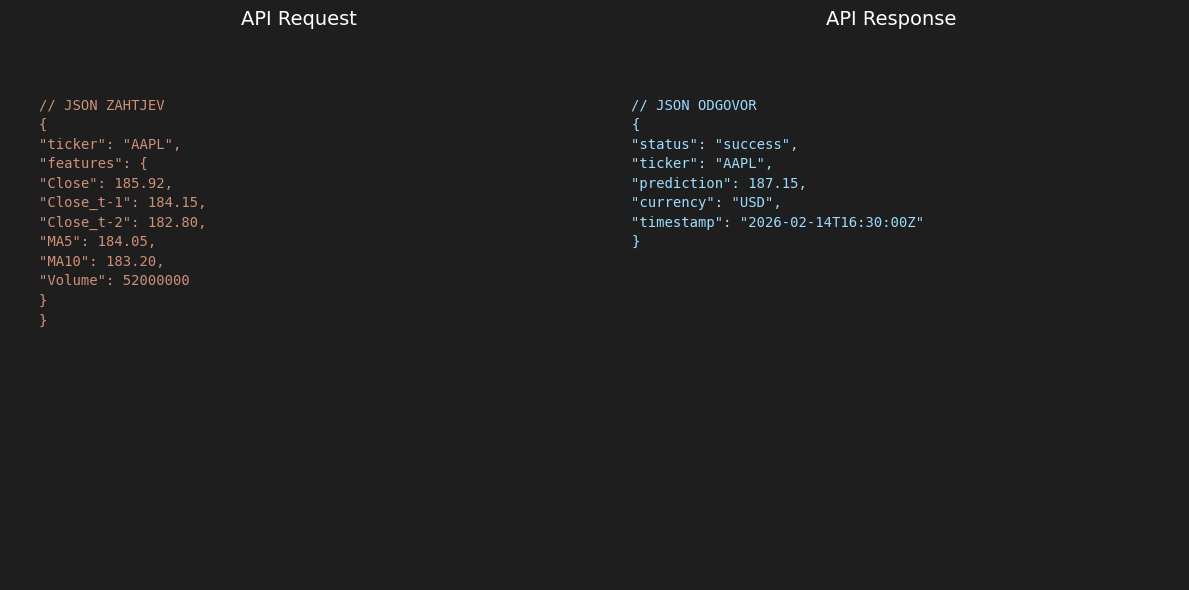

In [2]:
import matplotlib.pyplot as plt

request_text = """
// JSON ZAHTJEV
{
"ticker": "AAPL",
"features": {
"Close": 185.92,
"Close_t-1": 184.15,
"Close_t-2": 182.80,
"MA5": 184.05,
"MA10": 183.20,
"Volume": 52000000
}
}
"""

response_text = """
// JSON ODGOVOR
{
"status": "success",
"ticker": "AAPL",
"prediction": 187.15,
"currency": "USD",
"timestamp": "2026-02-14T16:30:00Z"
}
"""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('#1e1e1e')

ax1.set_facecolor('#2d2d2d')
ax1.text(0.05, 0.95, request_text, family='monospace', fontsize=10, color='#ce9178', verticalalignment='top', linespacing=1.5)
ax1.set_title("API Request", color='white', fontsize=14, pad=20)
ax1.axis('off')

ax2.set_facecolor('#2d2d2d')
ax2.text(0.05, 0.95, response_text, family='monospace', fontsize=10, color='#9cdcfe', verticalalignment='top', linespacing=1.5)
ax2.set_title("API Response", color='white', fontsize=14, pad=20)
ax2.axis('off')

plt.tight_layout()
plt.savefig("api_json_struktura.png", bbox_inches='tight', facecolor=fig.get_facecolor(), dpi=300)
plt.show()